# Ok, let's test out some python!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime as datetime
import warnings as warnings

# Show all cell outputs:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# Import data
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d_%H_%M') #note that the Minute value should be multiplied by 15
data = pd.read_csv('data/HISTORY15MINS.csv', parse_dates=['dhq'], date_parser=dateparse)
data.head()

,dhq,BATTERY_1_TOTPF_1,BATTERY_1_TOTW_1,BATTERY_2_TOTPF_1,BATTERY_2_TOTW_1,ENGINE_1_TOTW_1,ENGINE_2_TOTW_1,ENGINE_3_TOTW_1,LOAD_1_TOTW_1,LOAD_1_TOTW_2,LOAD_1_TOTW_3,LOAD_1_TOTW_4,LOAD_1_TOTW_5,PV_1_TOTW_1,PV_2_TOTW_1,PV_3_TOTW_1
0,2015-07-01 12:04:00,100.0,-135.000000,100.0,-1942.500000,0.0,0.0,-8132.750000,109.500000,3975.250000,7250.250000,-4918.250000,-27.250000,NaN,NaN,NaN
1,2015-07-01 13:01:00,100.0,-145.000000,100.0,-1525.000000,0.0,0.0,-7336.500000,109.500000,4044.000000,7320.500000,-5658.000000,-26.500000,NaN,NaN,NaN
2,2015-07-01 13:02:00,100.0,-125.000000,100.0,-1245.000000,0.0,0.0,-8385.166667,842.666667,3925.333333,7237.000000,-4729.166667,-23.833333,NaN,NaN,NaN
3,2015-07-01 13:03:00,100.0,-125.000000,100.0,-1030.000000,0.0,0.0,-8724.000000,145.500000,4351.500000,7231.500000,-3933.500000,-25.500000,NaN,NaN,NaN
4,2015-07-01 13:04:00,100.0,-126.666667,100.0,-986.666667,0.0,0.0,-10764.166667,916.333333,4131.666667,7346.333333,-2649.833333,223.500000,NaN,NaN,NaN


In [6]:
# Add column with correct datetime format
def make_datetime(row):
    date = datetime.datetime.strftime(row['dhq'], '%Y-%m-%d %H:')
    minute = row['dhq'].minute +(row['dhq'].minute - 1) * 15 - row['dhq'].minute
    return date + str(minute) + ':00'

data['datetime'] = pd.to_datetime(data.apply(make_datetime, axis=1))
data.head()

,dhq,BATTERY_1_TOTPF_1,BATTERY_1_TOTW_1,BATTERY_2_TOTPF_1,BATTERY_2_TOTW_1,ENGINE_1_TOTW_1,ENGINE_2_TOTW_1,ENGINE_3_TOTW_1,LOAD_1_TOTW_1,LOAD_1_TOTW_2,LOAD_1_TOTW_3,LOAD_1_TOTW_4,LOAD_1_TOTW_5,PV_1_TOTW_1,PV_2_TOTW_1,PV_3_TOTW_1,datetime
0,2015-07-01 12:04:00,100.0,-135.000000,100.0,-1942.500000,0.0,0.0,-8132.750000,109.500000,3975.250000,7250.250000,-4918.250000,-27.250000,NaN,NaN,NaN,2015-07-01 12:45:00
1,2015-07-01 13:01:00,100.0,-145.000000,100.0,-1525.000000,0.0,0.0,-7336.500000,109.500000,4044.000000,7320.500000,-5658.000000,-26.500000,NaN,NaN,NaN,2015-07-01 13:00:00
2,2015-07-01 13:02:00,100.0,-125.000000,100.0,-1245.000000,0.0,0.0,-8385.166667,842.666667,3925.333333,7237.000000,-4729.166667,-23.833333,NaN,NaN,NaN,2015-07-01 13:15:00
3,2015-07-01 13:03:00,100.0,-125.000000,100.0,-1030.000000,0.0,0.0,-8724.000000,145.500000,4351.500000,7231.500000,-3933.500000,-25.500000,NaN,NaN,NaN,2015-07-01 13:30:00
4,2015-07-01 13:04:00,100.0,-126.666667,100.0,-986.666667,0.0,0.0,-10764.166667,916.333333,4131.666667,7346.333333,-2649.833333,223.500000,NaN,NaN,NaN,2015-07-01 13:45:00


In [7]:
# Set index: datetime column
data.set_index('datetime', inplace = True)
data.sort_index(axis=0, level=None, ascending=True, inplace=True)

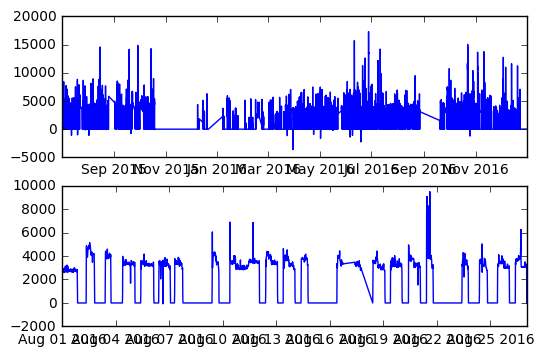

In [8]:
# Testing, only consider LOAD_1_TOTW_1
colname = 'LOAD_1_TOTW_2'
tsfull = data[[colname]]
plt.subplot(2,1,1)
plt.plot(tsfull)
# For further testing, only select after december:
ts = tsfull['2016-08-01':'2016-09-01']
plt.subplot(2,1,2)
plt.plot(ts)
# Save as Series
ts = pd.Series(ts[colname])

In [11]:
# Let's check for stationarity!
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(center = False, window = 96).mean()
    rolstd = timeseries.rolling(center = False, window = 96).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

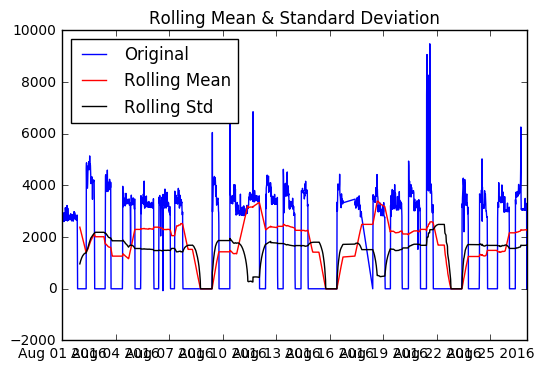

Results of Dickey-Fuller Test:
Test Statistic                -8.193058e+00
p-value                        7.576461e-13
#Lags Used                     1.700000e+01
Number of Observations Used    2.361000e+03
Critical Value (1%)           -3.433123e+00
Critical Value (10%)          -2.567422e+00
Critical Value (5%)           -2.862765e+00
dtype: float64


In [37]:
test_stationarity(ts)

# # Let's forecast some data!

In [37]:
def BaseCaseLastWeek(data, datetimestr):
    # forecast for date is realisation of date-7days
    # data should be a Series, datetime should be a string of format 'YYYY-mm-dd HH:MM:SS'
    if not isinstance(data, pd.core.series.Series): 
        # try to cast as series
        warnings.warn("Data should be of type Series, trying to cast")
        data = pd.Series(data)

    datetimestr = pd.to_datetime(datetimestr)
    sliced = data[datetimestr + datetime.timedelta(days = -7) : datetimestr + datetime.timedelta(days = -6)]
    if sliced.count() == 0: warnings.warn("Insufficient data to forecast datetime. Returning empyt series")
    return sliced

In [41]:
BaseCaseLastWeek(ts, "2016-09-27 07:00:00")

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Insufficient data to forecast datetime. Returning empyt series


Series([], Name: LOAD_1_TOTW_2, dtype: float64)

In [ ]:
ts.resample("60T")